1- Business understanding
In this part, we are going to predict the price of airbnb houses, based on Seattle Airbnb Open Data which is provided by kaggle using listing dataset Being able to predict the price of airbnb houses can be helpful for landlords and guests to analyse the price properly.
    

2- Data understanding
There 3 files on dataset that only Listing dataset was useful for our evaluation. Based on Listing dataset, there are 30 columns, and 20 columns have been chosen to analyse the price and revew score value. Among these 20 columns 12 columns had missing values. 

3- Data preparation
A function has been created to replace NA with 0 in review related featueres due to the high missing values in these column, then rest of columns with minor missing values has been droped.
Finally, numeric features have been chosen for prediction.

4- Data Modeling
Two algorythms have been used to predict the price, Linear Regression and Random Forest Regressor. Therefore, after spliting the data to train and test, we need to do 4 stepts to model the data, first instantiate, secondly fit the model, then predict and finnaly score the model.

5- Result Evaluation
Two method have been used to evaluate the models, r2_score, and mean_squared_error and the results says:
Linear Regression: r2_score= 0.46, mean_squared_error= 4225.5
Random Forest Regressor: r2_score= 0.48, mean_squared_error= 4097.3

In [1]:
from google.colab import drive

In [2]:
drive.mount("/content/drive")

Mounted at /content/drive


In [3]:
import pandas as pd

listings="/content/drive/MyDrive/listings.csv"
df = pd.read_csv(listings)

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.ensemble import RandomForestRegressor 
import seaborn as sns

In [5]:
df.describe()

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,...,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,calculated_host_listings_count,reviews_per_month
count,3.818000e+03,3.818000e+03,3.818000e+03,3816.000000,3816.000000,3818.000000,3818.000000,3818.000000,3802.000000,3812.000000,...,3171.000000,3160.000000,3165.000000,3160.000000,3167.000000,3163.000000,3162.000000,0.0,3818.000000,3191.000000
mean,5.550111e+06,2.016010e+13,1.578556e+07,7.157757,7.157757,47.628961,-122.333103,3.349398,1.259469,1.307712,...,94.539262,9.636392,9.556398,9.786709,9.809599,9.608916,9.452245,NaN,2.946307,2.078919
std,2.962660e+06,0.000000e+00,1.458382e+07,28.628149,28.628149,0.043052,0.031745,1.977599,0.590369,0.883395,...,6.606083,0.698031,0.797274,0.595499,0.568211,0.629053,0.750259,NaN,5.893029,1.822348
min,3.335000e+03,2.016010e+13,4.193000e+03,1.000000,1.000000,47.505088,-122.417219,1.000000,0.000000,0.000000,...,20.000000,2.000000,3.000000,2.000000,2.000000,4.000000,2.000000,NaN,1.000000,0.020000
25%,3.258256e+06,2.016010e+13,3.275204e+06,1.000000,1.000000,47.609418,-122.354320,2.000000,1.000000,1.000000,...,93.000000,9.000000,9.000000,10.000000,10.000000,9.000000,9.000000,NaN,1.000000,0.695000
50%,6.118244e+06,2.016010e+13,1.055814e+07,1.000000,1.000000,47.623601,-122.328874,3.000000,1.000000,1.000000,...,96.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,1.000000,1.540000
75%,8.035127e+06,2.016010e+13,2.590309e+07,3.000000,3.000000,47.662694,-122.310800,4.000000,1.000000,2.000000,...,99.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,2.000000,3.000000
max,1.034016e+07,2.016010e+13,5.320861e+07,502.000000,502.000000,47.733358,-122.240607,16.000000,8.000000,7.000000,...,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,37.000000,12.150000


In [6]:
raw=df[['id','host_is_superhost','neighbourhood_group_cleansed','property_type','room_type','accommodates',
             'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities','number_of_reviews','review_scores_rating',
             'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 
             'review_scores_communication', 'review_scores_location', 'review_scores_value','price']]

In [7]:
raw['price']=raw['price'].str.replace('$','')
raw['price']=raw['price'].str.replace(',','')
raw['price']=raw['price'].astype('float64')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/panda

In [8]:
import numpy as np
np.sum(raw.isnull())

id                                0
host_is_superhost                 2
neighbourhood_group_cleansed      0
property_type                     1
room_type                         0
accommodates                      0
bathrooms                        16
bedrooms                          6
beds                              1
bed_type                          0
amenities                         0
number_of_reviews                 0
review_scores_rating            647
review_scores_accuracy          658
review_scores_cleanliness       653
review_scores_checkin           658
review_scores_communication     651
review_scores_location          655
review_scores_value             656
price                             0
dtype: int64

In [9]:
raw.isnull().any()

id                              False
host_is_superhost                True
neighbourhood_group_cleansed    False
property_type                    True
room_type                       False
accommodates                    False
bathrooms                        True
bedrooms                         True
beds                             True
bed_type                        False
amenities                       False
number_of_reviews               False
review_scores_rating             True
review_scores_accuracy           True
review_scores_cleanliness        True
review_scores_checkin            True
review_scores_communication      True
review_scores_location           True
review_scores_value              True
price                           False
dtype: bool

In [10]:
raw

,id,host_is_superhost,neighbourhood_group_cleansed,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,price
0,241032,f,Queen Anne,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",207,95.0,10.0,10.0,10.0,10.0,9.0,10.0,85.0
1,953595,t,Queen Anne,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,Internet,""Wireless Internet"",Kitchen,""Free...",43,96.0,10.0,10.0,10.0,10.0,10.0,10.0,150.0
2,3308979,f,Queen Anne,House,Entire home/apt,11,4.5,5.0,7.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",20,97.0,10.0,10.0,10.0,10.0,10.0,10.0,975.0
3,7421966,f,Queen Anne,Apartment,Entire home/apt,3,1.0,0.0,2.0,Real Bed,"{Internet,""Wireless Internet"",Kitchen,""Indoor ...",0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.0
4,278830,f,Queen Anne,House,Entire home/apt,6,2.0,3.0,3.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",38,92.0,9.0,9.0,10.0,10.0,9.0,9.0,450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3813,8101950,f,Other neighborhoods,House,Entire home/apt,6,2.0,3.0,3.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",1,80.0,8.0,10.0,4.0,8.0,10.0,8.0,359.0
3814,8902327,f,Capitol Hill,Apartment,Entire home/apt,4,1.0,1.0,2.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",2,100.0,10.0,10.0,10.0,10.0,10.0,10.0,79.0
3815,10267360,f,Rainier Valley,House,Entire home/apt,2,1.0,1.0,1.0,Real Bed,"{""Cable TV"",""Wireless Internet"",Kitchen,""Free ...",0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,93.0
3816,9604740,f,Capitol Hill,Condominium,Entire home/apt,2,1.0,0.0,1.0,Real Bed,"{TV,""Wireless Internet"",Kitchen,""Free Parking ...",0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,99.0


In [11]:
raw.shape[0]-raw.count()

id                                0
host_is_superhost                 2
neighbourhood_group_cleansed      0
property_type                     1
room_type                         0
accommodates                      0
bathrooms                        16
bedrooms                          6
beds                              1
bed_type                          0
amenities                         0
number_of_reviews                 0
review_scores_rating            647
review_scores_accuracy          658
review_scores_cleanliness       653
review_scores_checkin           658
review_scores_communication     651
review_scores_location          655
review_scores_value             656
price                             0
dtype: int64

In [12]:
raw.review_scores_cleanliness.value_counts()

10.0    2161
9.0      740
8.0      184
7.0       40
6.0       30
5.0        5
4.0        4
3.0        1
Name: review_scores_cleanliness, dtype: int64

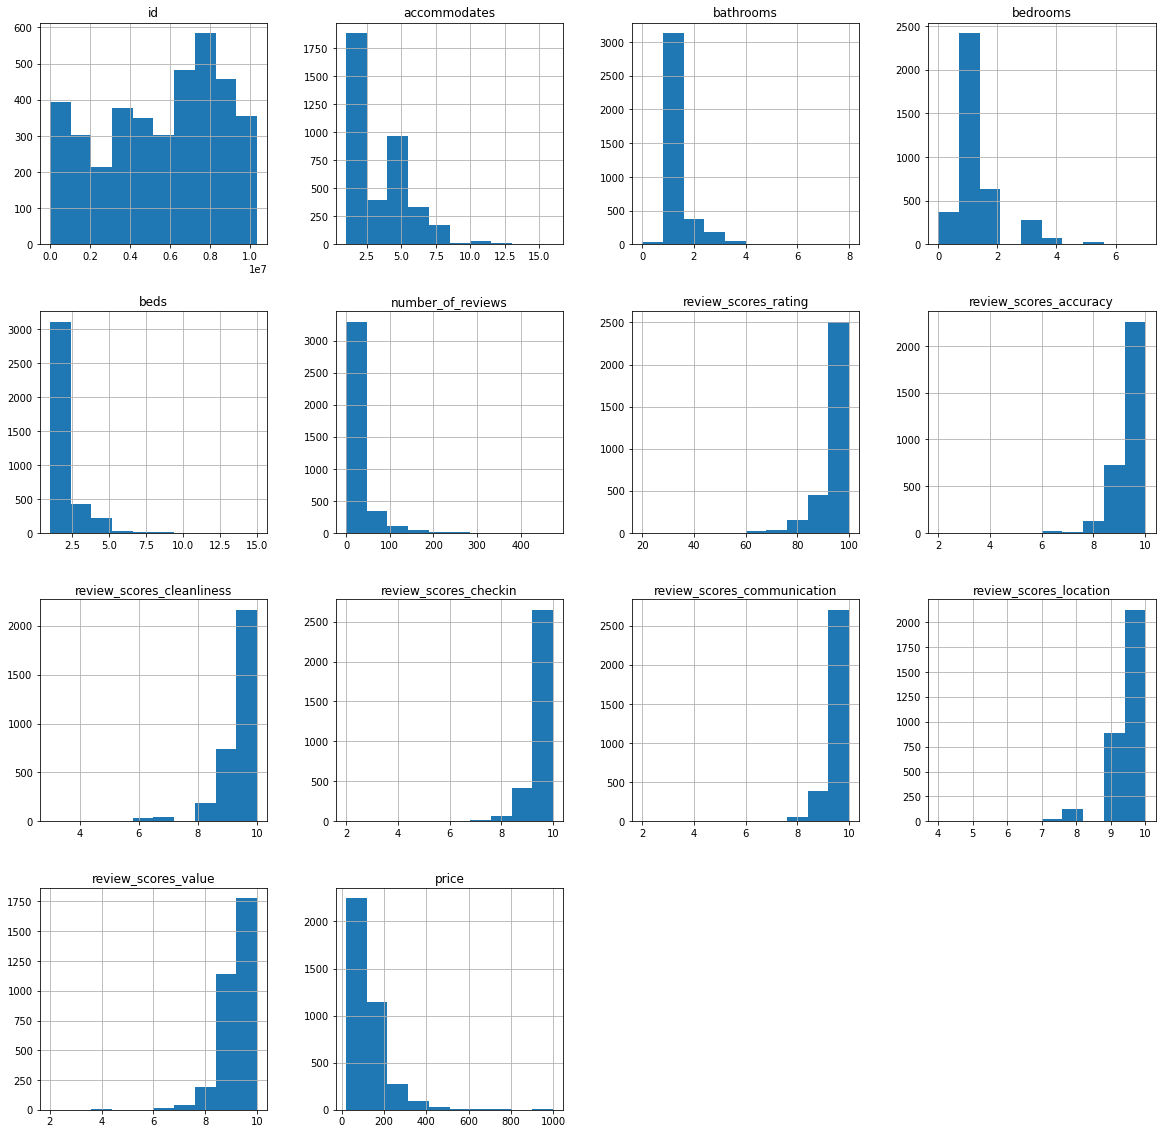

In [13]:
raw.hist(figsize=(20,20));

In [29]:
import numpy as np
def fill_na(data,col_name):
    '''
    Function that fills na with 0 in review score related columns
    Args:
        data: name of dataset
        col_name: name of colums that have missing values
    ''' 
    data[col_name][np.isnan(data[col_name])]=0

for i in raw.filter(regex='^review'):
    fill_na(raw,i)

raw.shape[0]-raw.count()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:8870: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


id                              0
host_is_superhost               0
neighbourhood_group_cleansed    0
property_type                   0
room_type                       0
accommodates                    0
bathrooms                       0
bedrooms                        0
beds                            0
bed_type                        0
amenities                       0
number_of_reviews               0
review_scores_rating            0
review_scores_accuracy          0
review_scores_cleanliness       0
review_scores_checkin           0
review_scores_communication     0
review_scores_location          0
review_scores_value             0
price                           0
dtype: int64

In [30]:
raw=raw.dropna(subset=['host_is_superhost','property_type','bathrooms','bedrooms','beds'])

raw.shape[0]-raw.count()

id                              0
host_is_superhost               0
neighbourhood_group_cleansed    0
property_type                   0
room_type                       0
accommodates                    0
bathrooms                       0
bedrooms                        0
beds                            0
bed_type                        0
amenities                       0
number_of_reviews               0
review_scores_rating            0
review_scores_accuracy          0
review_scores_cleanliness       0
review_scores_checkin           0
review_scores_communication     0
review_scores_location          0
review_scores_value             0
price                           0
dtype: int64

In [31]:
raw2=raw[['bathrooms', 'bedrooms', 'beds','review_scores_rating',
             'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 
             'review_scores_communication', 'review_scores_location', 'review_scores_value','price']]

In [32]:
raw2.dtypes

bathrooms                      float64
bedrooms                       float64
beds                           float64
review_scores_rating           float64
review_scores_accuracy         float64
review_scores_cleanliness      float64
review_scores_checkin          float64
review_scores_communication    float64
review_scores_location         float64
review_scores_value            float64
price                          float64
dtype: object

In [33]:
raw2.isnull().any()

bathrooms                      False
bedrooms                       False
beds                           False
review_scores_rating           False
review_scores_accuracy         False
review_scores_cleanliness      False
review_scores_checkin          False
review_scores_communication    False
review_scores_location         False
review_scores_value            False
price                          False
dtype: bool

In [34]:
np.isfinite(raw2.all())

bathrooms                      True
bedrooms                       True
beds                           True
review_scores_rating           True
review_scores_accuracy         True
review_scores_cleanliness      True
review_scores_checkin          True
review_scores_communication    True
review_scores_location         True
review_scores_value            True
price                          True
dtype: bool

In [35]:
np.isnan(raw2.any())

bathrooms                      False
bedrooms                       False
beds                           False
review_scores_rating           False
review_scores_accuracy         False
review_scores_cleanliness      False
review_scores_checkin          False
review_scores_communication    False
review_scores_location         False
review_scores_value            False
price                          False
dtype: bool

In [37]:
X = raw2[['bathrooms', 'bedrooms', 'beds','review_scores_rating',
             'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 
             'review_scores_communication', 'review_scores_location', 'review_scores_value']]
y = raw2['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state=42) 

lm_model = LinearRegression(normalize=True) 
lm_model.fit(X_train, y_train) 
        
y_test_preds = lm_model.predict(X_test) 

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  FutureWarning,


In [38]:
r2_score(y_test, y_test_preds)

0.45894917007118896

In [39]:
mean_squared_error(y_test, y_test_preds)

4225.533781098349

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state=42) 

lm2_model = RandomForestRegressor() 
lm2_model.fit(X_train, y_train) 
        

y_test_preds = lm2_model.predict(X_test)

In [41]:
r2_score(y_test, y_test_preds)

0.47762546457971145

In [42]:
mean_squared_error(y_test, y_test_preds)

4079.674447767529